In [1]:
# Insect Classification using Deep Learning
# This notebook implements an insect classification system using TensorFlow and CNN

# 1. Install and Import Dependencies
!pip install tensorflow tensorflow-gpu opencv-python matplotlib numpy pandas pillow scikit-learn

^C


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tensorflow_gpu-2.10.1-cp310-cp310-win_amd64.whl.metadata (3.1 kB)
  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl.metadata (15 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl.metadata (1.9 kB)
INFO: pip is looking at multiple versions of tensorflow-gpu to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow_gpu-2.10.0-cp310-cp310-win_amd64.whl.metadata (3.1 kB)
  Using cached tensorflow_gpu-2.9.3-cp310-cp310-win_amd64.whl.metadata (3.0 kB)
  Using 

Requested tensorflow-gpu from https://files.pythonhosted.org/packages/8a/45/fa31ced1db38f9424f262dfbf35747fe5378b5c808cecb373c8cb8e515d3/tensorflow-gpu-2.12.0.tar.gz has invalid metadata: Expected end or semicolon (after name and no valid version specifier)
    python_version>"3.7"
                  ^
Please use pip<24.1 if you need to use this version.
Requested tensorflow-gpu from https://files.pythonhosted.org/packages/8a/45/fa31ced1db38f9424f262dfbf35747fe5378b5c808cecb373c8cb8e515d3/tensorflow-gpu-2.12.0.tar.gz has invalid metadata: Expected end or semicolon (after name and no valid version specifier)
    python_version>"3.7"
                  ^
Please use pip<24.1 if you need to use this version.
Requested tensorflow-gpu from https://files.pythonhosted.org/packages/8a/45/fa31ced1db38f9424f262dfbf35747fe5378b5c808cecb373c8cb8e515d3/tensorflow-gpu-2.12.0.tar.gz has invalid metadata: Expected end or semicolon (after name and no valid version specifier)
    python_version>"3.7"
     

In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [18]:
data_train_path = 'C:/Users/N I T R O/Desktop/Insect classification/dataset/train'
data_test_path = 'C:/Users/N I T R O/Desktop/Insect classification/dataset/test'
data_val_path = 'C:/Users/N I T R O/Desktop/Insect classification/dataset/validation'

In [19]:
img_width = 180
img_height =180 

In [22]:

data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=0.2,  # Define split percentage
    subset="training",  # Specify subset
    seed=42
)
# in the form of array

Found 2052 files belonging to 9 classes.
Using 1642 files for training.


In [23]:
data_cat = data_train.class_names

In [24]:
data_cat

['Ant',
 'Bee',
 'Beetle',
 'Butterfly',
 'Dragonfly',
 'Fly',
 'Grasshopper',
 'Ladybug',
 'Mosquito']

In [25]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=0.2,  # Same split as above
    subset="validation",  # Specify subset
    seed=42
)

Found 2052 files belonging to 9 classes.
Using 410 files for validation.


In [26]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,  # No need to shuffle test data
    image_size=(img_width, img_height),
    batch_size=32
)


Found 2052 files belonging to 9 classes.


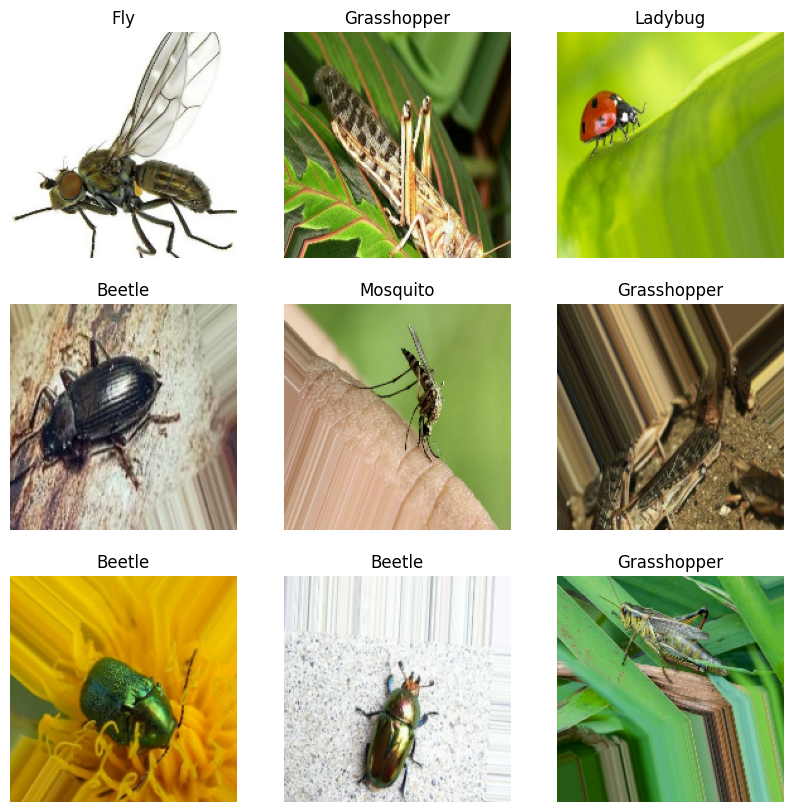

In [27]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [31]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,969,405 (45.66 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,979,604 (30.44 MB)

In [33]:
epochs_size = 20
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.1334 - loss: 4.1471 - val_accuracy: 0.3244 - val_loss: 1.9125
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.3908 - loss: 1.8093 - val_accuracy: 0.4610 - val_loss: 1.5680
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.4980 - loss: 1.4577 - val_accuracy: 0.4756 - val_loss: 1.5106
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.5745 - loss: 1.1920 - val_accuracy: 0.4927 - val_loss: 1.4931
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.6789 - loss: 0.9918 - val_accuracy: 0.4829 - val_loss: 1.5207
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.7896 - loss: 0.6790 - val_accuracy: 0.4561 - val_loss: 1.7030
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8443 - loss: 0.5178 - val_accuracy: 0.4561 - val_loss: 1.7811
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8903 - loss: 0.3780 - val_accuracy: 0.4659 - 

Text(0.5, 1.0, 'Loss')

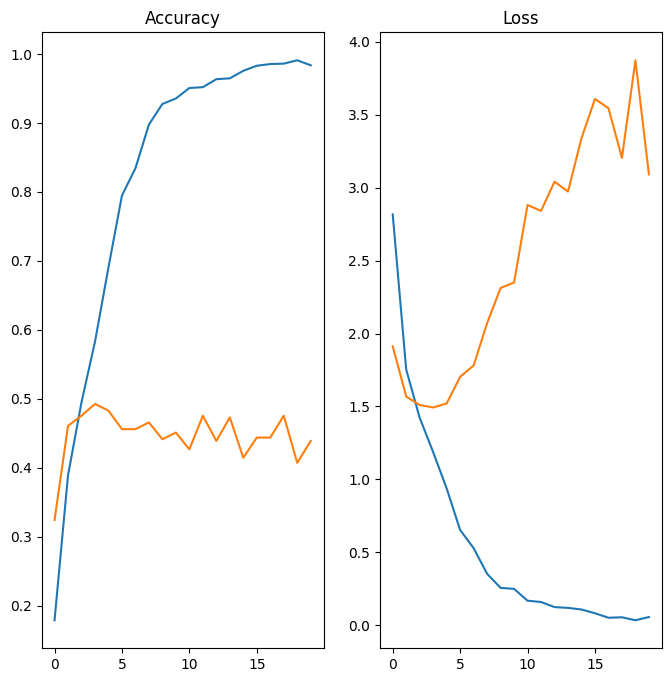

In [34]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [46]:
image = 'C:/Users/N I T R O/Desktop/Insect classification/aug_Ant_393_0_5342.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [47]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [48]:
score = tf.nn.softmax(predict)

In [49]:
print( 'insect image is {} with accuracy of{:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100) )

insect image is Ant with accuracy of97.39


In [52]:
model.save('insect_classi.keras')